In [112]:
import pandas as pd
import requests
from requests import get
from bs4 import BeautifulSoup
import random
import time
import geopandas as gpd

In [113]:
df1=pd.read_csv('/Users/michaelrosen/Desktop/Housing_Modeling/Data/la_apts_SFV_geometry_May27.csv')
df2=pd.read_csv('/Users/michaelrosen/Desktop/Housing_Modeling/Data/wst_5-25_geometry.csv')
df3=pd.read_csv('/Users/michaelrosen/Desktop/Housing_Modeling/Data/lac_5-23_latlong.csv')
df4=pd.read_csv('/Users/michaelrosen/Desktop/Housing_Modeling/Data/sgv_latlong.csv')
df5=pd.read_csv('/Users/michaelrosen/Desktop/Housing_Modeling/Data/lgb_latlong.csv')

In [114]:
df1['x']=df1['x']*-1

In [115]:
df=pd.concat([df1, df2, df3, df4, df5])

In [116]:
df = df.drop(columns=['Unnamed: 0.1','Unnamed: 0'])

In [27]:
df.to_csv('Data/joins_MAY_27.csv')

In [117]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.x, df.y))

In [118]:
la=gpd.read_file('/Users/michaelrosen/Desktop/Housing_Modeling/Data/lacounty_clipped.geojson')

In [155]:
geojoin=gpd.sjoin(gdf.set_crs(epsg=4326),la,how='right')

In [157]:
geojoin.head()

index_left            posted       neighborhood  \
0      1526.0  2022-05-23 18:03   (Marina del Rey)   
0      2020.0  2022-05-23 09:47   (Marina del Rey)   
0      2647.0  2022-05-21 13:45   (Marina Del Rey)   
1        47.0  2022-05-25 12:16     (Venice Beach)   
1        48.0  2022-05-25 12:15     (Venice Beach)   

                                          post title  number bedrooms    sqft  \
0  Pristine 3Bd, 2 Ba Townhouse In Marina Del Rey...              3.0  1500.0   
0  3 Bedroom Furnished Marina del Rey Peninsula/V...              3.0  1850.0   
0  Marina del Rey Beach Furnished 3 bedroom 3 bat...              3.0  1800.0   
1  Recently Updated 3 Bedroom 2 Bath Quiet Walk S...              3.0  1400.0   
1  Recently Updated 3 Bedroom 2 Bath Quiet Walk S...              3.0  1400.0   

                                                 URL  price  \
0  https://losangeles.craigslist.org/wst/apa/d/ma...  6,500   
0  https://losangeles.craigslist.org/wst/apa/d/ve...  7,200   
0  https://losangeles.craigslist.org/wst/apa/d/ve...  6,995   
1  https://losangeles.craigslist.org/wst/apa/d/ve...  5,500   
1  https://losangeles.craigslist.org/wst/apa/d/ve...  5,500   

                         latlon          y  ...  EducProf EducDoct     PctNHW  \
0  ['33.976661', '-118.462111']  33.976661  ...     411.0    247.0  77.964519   
0  ['33.976739', '-118.462411']  33.976739  ...     411.0    247.0  77.964519   
0  ['33.979506', '-118.464868']  33.979506  ...     411.0    247.0  77.964519   
1  ['33.980825', '-118.467207']  33.980825  ...     258.0     99.0  87.822791   
1  ['33.980825', '-118.467207']  33.980825  ...     258.0     99.0  87.822791   

   PctBlackAA  PctAsian     pctPOC  PctBachelor  PctMasters  PctDoctorate  \
0    2.054155  8.216620  22.035481    34.970946   27.284733      6.524036   
0    2.054155  8.216620  22.035481    34.970946   27.284733      6.524036   
0    2.054155  8.216620  22.035481    34.970946   27.284733      6.524036   
1    1.800521  3.837953  12.177209    43.043599   23.965565      2.749236   
1    1.800521  3.837953  12.177209    43.043599   23.965565      2.749236   

                                            geometry  
0  POLYGON ((-118.46683 33.97905, -118.46654 33.9...  
0  POLYGON ((-118.46683 33.97905, -118.46654 33.9...  
0  POLYGON ((-118.46683 33.97905, -118.46654 33.9...  
1  POLYGON ((-118.47136 33.98425, -118.47106 33.9...  
1  POLYGON ((-118.47136 33.98425, -118.47106 33.9...  

[5 rows x 37 columns]

In [158]:
listings_only = gpd.GeoDataFrame(
    geojoin, geometry=gpd.points_from_xy(geojoin.x, geojoin.y))

<AxesSubplot:>

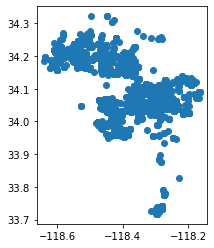

In [160]:
listings_only.plot()

In [161]:
brain=geojoin['GEOID'].value_counts()

In [165]:
geojoin.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 7551 entries, 0 to 1148
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   index_left       6902 non-null   float64 
 1   posted           6902 non-null   object  
 2   neighborhood     6902 non-null   object  
 3   post title       6902 non-null   object  
 4   number bedrooms  5506 non-null   float64 
 5   sqft             5633 non-null   float64 
 6   URL              6902 non-null   object  
 7   price            6784 non-null   object  
 8   latlon           6902 non-null   object  
 9   y                6902 non-null   float64 
 10  x                6902 non-null   float64 
 11  GEOID            7551 non-null   object  
 12  TotalPop         7551 non-null   float64 
 13  WhitePop         7551 non-null   float64 
 14  BlackorAA        7551 non-null   float64 
 15  AmInd_AKnative   7551 non-null   float64 
 16  Asian            7551 non-null   f

In [166]:
geojoin.to_csv('Data/JOINED_CENSUS_LISTINGS_MAY_27.csv')